In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

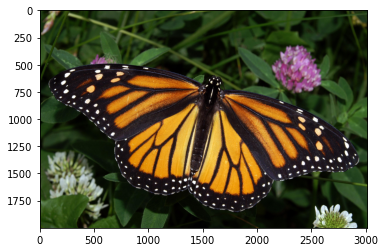

In [2]:
#Read an image
image = cv2.imread(r'..\CVND_Exercises-master\1_3_Types_of_Features_Image_Segmentation\images\monarch.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [3]:
#Reshape into Mx3 matrix where M is all pixels noted by -1
#Convert it into float32
img_reshape = image_copy.reshape(-1,3)
img_reshape = np.float32(img_reshape)

In [24]:
#define criteria and no of clusters for k-means algo
k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [25]:
#call cv2.kmeans()
retval, labels, centers = cv2.kmeans(img_reshape, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print('retval',retval)
print('labels',labels)
print('centers',centers)

retval 12258280822.232185
labels [[2]
 [2]
 [2]
 ...
 [0]
 [0]
 [0]]
centers [[ 20.498487   24.00453    12.6677885]
 [204.76007   153.38452    80.19841  ]
 [ 62.469734   74.75589    38.06773  ]]


In [26]:
#revert centers to uint8
#reshape the segmented data to original shape
print('len(labels)',len(labels))
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
print('centers', centers)
print('segmented_data',segmented_data)
print('len(segmented_data)',len(segmented_data))

len(labels) 6016000
centers [[ 20  24  12]
 [204 153  80]
 [ 62  74  38]]
segmented_data [[62 74 38]
 [62 74 38]
 [62 74 38]
 ...
 [20 24 12]
 [20 24 12]
 [20 24 12]]
len(segmented_data) 6016000


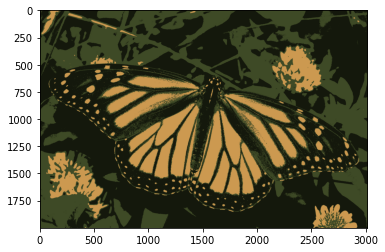

In [27]:
segmented_image = segmented_data.reshape((image_copy.shape))
#labels_reshape = labels.reshape(image_copy[0],image_copy[1])
plt.imshow(segmented_image)